# Predicting Funding for Startups

### Data Information

The dataset contains information of 3000+ startups originated all over India.

The information includes the startups date of funding, industry vertical and sub vertical and location of origin.

Using this data ,we will first do an EDA (Exploratory Data Analysis) of the data and then try to make a model to predict the funding obtained by any startup originating in 2020.

## Loading the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
import plotly.express as px
import plotly.graph_objects as go
data = pd.read_csv('startup_funding.csv')
data_test=  data.loc[(data['Amount in USD'].isna()) | (data['Amount in USD']=='undisclosed')| (data['Amount in USD']=='unknown')| (data['Amount in USD']=='Undisclosed')| (data['Amount in USD']=='N/A')]
data = data.drop(data_test.index,axis=0)
data = data.drop(['Sr No'],axis=1)

In [5]:
data.sample(5)

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
248,25/06/2018,PolicyBazaar,Consumer Internet,Online Insurance Selling Platform,Gurugram,SoftBank Vision Fund & Info Edge (India) Ltd,Private Equity,"20,00,00,000",NaN
1991,24/02/2016,NoBroker,Consumer Internet,Peer to peer property listing platform,Bangalore,"Beenext, Digital Garage, Beenos, Qualgro, Mamo...",Private Equity,"1,00,00,000",NaN
353,05/02/2018,Asia Institute Of Medical Science,Healthcare,Super-specialty Hospital,Faridabad,CDC Group Plc,Private Equity,"2,10,00,000",NaN
2533,18/08/2015,IntelligenceNODE,Data Analytics Platform,NaN,Mumbai,"New Enterprise Associates, Orios Venture Partners",Private Equity,"42,00,000",Series A
2886,11/03/2015,Groupon India,NaN,NaN,NaN,Sequoia Capital,Private Equity,"2,00,00,000",NaN


## Exploratory Data Analysis (EDA)

Now we will move through each column of the data one-by-one to gauge the relation between diferent factors and their importance on the final funding obtained by the startup

In [6]:
for i in data.index:
    for j in data.columns:
        if pd.isnull(data.loc[i,j])==False :
            data.loc[i,j] = data.loc[i,j].replace('\\\\xc2\\\\xa0','')

### Date

In [7]:
data = data.rename(columns = {'Date dd/mm/yyyy':'Date'})
data.loc[data['Date']=='05/072018','Date'] = '05/07/2018'
data.loc[data['Date']=='01/07/015','Date'] = '01/07/2015'
data.loc[data['Date']=='22/01//2015','Date'] = '22/01/2015'
b =  data.loc[data['Amount in USD']=='N/A']
data = data.drop(b.index,axis=0)

In [8]:
data['Amount in USD'] = pd.to_numeric(data['Amount in USD'].apply(lambda x:x.replace(',','').replace('+','')))
data['Date'] = pd.to_datetime(data['Date'])

[Text(0, 0.5, 'Investment Count'),
 Text(0.5, 0, 'Month and year of investment'),
 Text(0.5, 1.0, 'Invesment count over the years')]

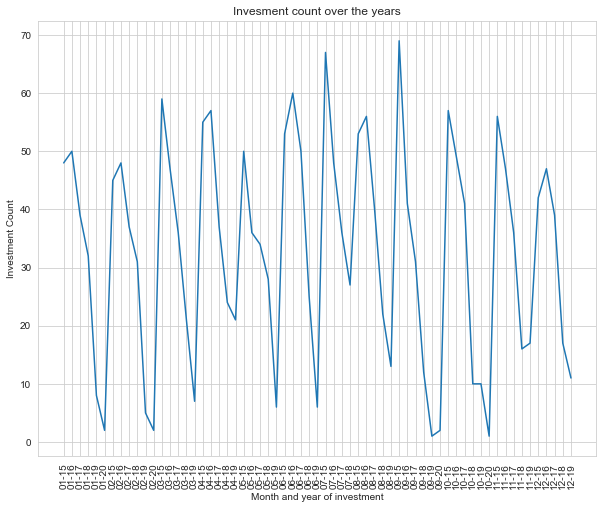

In [38]:
import plotly.graph_objects as go
b = data['Date'].apply(lambda x:x.strftime('%m-%y')).value_counts()
fig,ax = plt.subplots(figsize = (10,8))
sns.lineplot(x= b.index,y=b,ax=ax)
plt.xticks(rotation=90)
ax.set(ylabel= 'Investment Count',xlabel = 'Month and year of investment',title = 'Invesment count over the years')

[Text(0, 0.5, 'Investment Count'),
 Text(0.5, 0, 'Quarter and year of investment'),
 Text(0.5, 1.0, 'Invesment count over the years')]

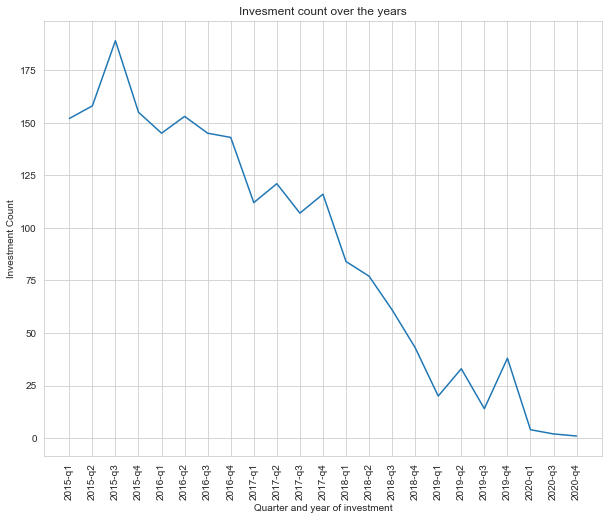

In [39]:
b  = pd.Series((data['Date'].dt.to_period('Q').dt.strftime('%Y-q%q'))).value_counts()
fig,ax = plt.subplots(figsize = (10,8))
sns.lineplot(x= b.index,y=b,ax=ax)
plt.xticks(rotation=90)
ax.set(ylabel= 'Investment Count',xlabel = 'Quarter and year of investment',title = 'Invesment count over the years')

Text(0.5, 1.0, 'Investment counts over the years')

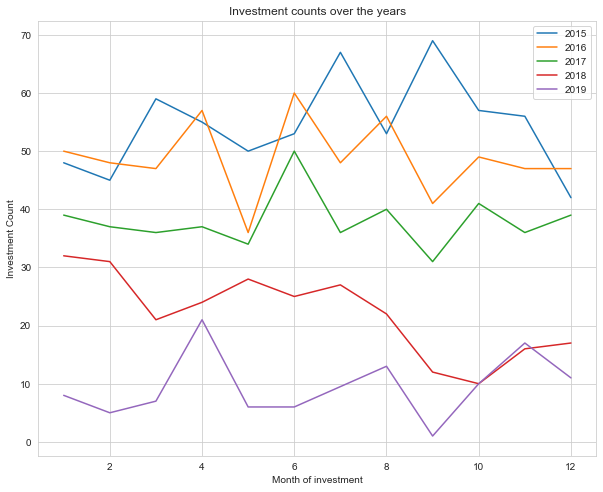

In [43]:
fig,ax = plt.subplots(figsize = (10,8))

for i in np.arange(2015,2020):
    b = data.loc[data['Date'].apply(lambda x:x.year)==i,'Date'].apply(lambda x:x.month).value_counts().sort_index()
    plt.plot(b.index,b,label =i)
plt.xlabel('Month of investment')
plt.ylabel('Investment Count')
plt.legend()
plt.title('Investment counts over the years')

[Text(0, 0.5, 'Startup Funding'),
 Text(0.5, 0, 'Year and month of investment'),
 Text(0.5, 1.0, 'Startup funding from 2015-2020')]

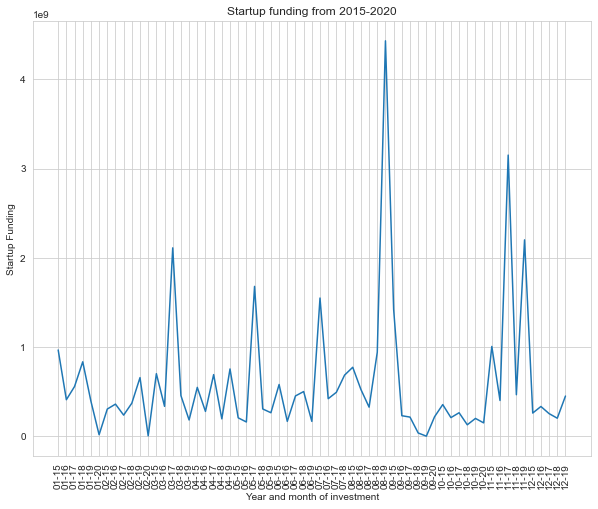

In [41]:
data['Temp_date'] = data['Date'].apply(lambda x:x.strftime('%m-%y'))
a = data.groupby('Temp_date')['Amount in USD'].sum()
fig,ax = plt.subplots(figsize = (10,8))
sns.lineplot(x= a.index,y=a,ax=ax)
plt.xticks(rotation=90)
ax.set(ylabel= 'Startup Funding',xlabel = 'Year and month of investment',title = 'Startup funding from 2015-2020')


[Text(0, 0.5, 'Startup Funding'),
 Text(0.5, 0, 'Year and quarter of investment'),
 Text(0.5, 1.0, 'Startup funding from 2015-2020')]

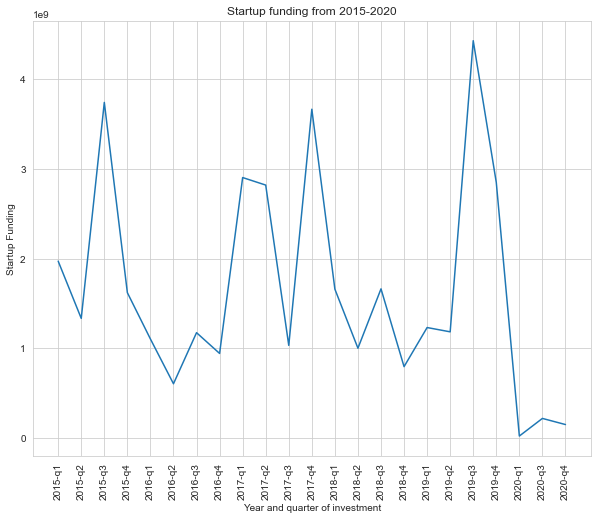

In [44]:
data['Temp_date'] = data['Date'].dt.to_period('Q').dt.strftime('%Y-q%q')
a = data.groupby('Temp_date')['Amount in USD'].sum()
fig,ax = plt.subplots(figsize = (10,8))
sns.lineplot(x= a.index,y=a,ax=ax)
plt.xticks(rotation=90)
ax.set(ylabel= 'Startup Funding',xlabel = 'Year and quarter of investment',title = 'Startup funding from 2015-2020')


Text(0.5, 1.0, 'Startup Funding over the years')

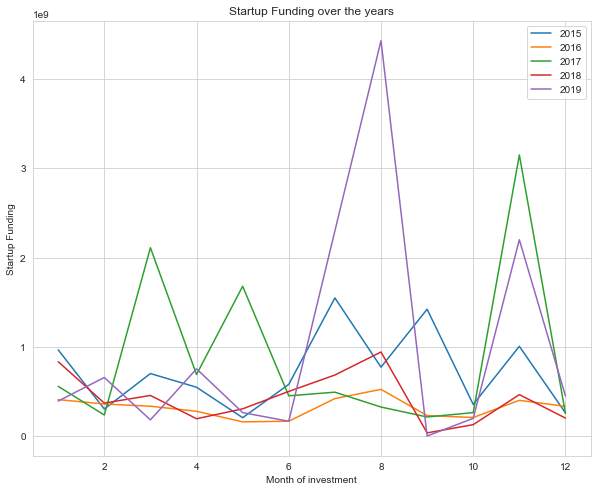

In [46]:
fig,ax = plt.subplots(figsize = (10,8))

for i in np.arange(2015,2020):
    b = data.loc[data['Date'].apply(lambda x:x.year)==i,'Date'].apply(lambda x:x.month)
    c = data.loc[data['Date'].apply(lambda x:x.year)==i,'Amount in USD']
    d = pd.DataFrame([b,c]).T.groupby('Date')['Amount in USD'].sum()
    plt.plot(d.index,d,label = i)
plt.xlabel('Month of investment')
plt.ylabel('Startup Funding')
plt.legend()
plt.title('Startup Funding over the years')    

In [50]:
import plotly.io as pio
pio.renderers.default = "svg"

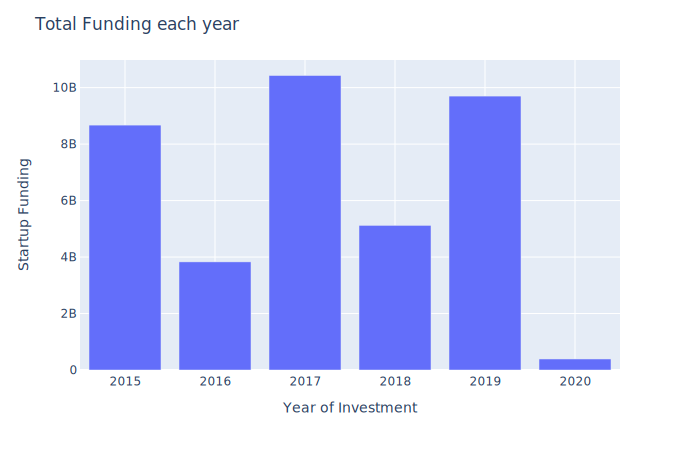

In [51]:
import plotly.express as px
b = data['Date'].apply(lambda x:x.year)
c = data['Amount in USD']
d = pd.DataFrame([b,c]).T.groupby('Date')['Amount in USD'].sum()
fig = px.bar(x = d.index,y = d)
fig.update_layout(yaxis_title = 'Startup Funding',xaxis_title= 'Year of Investment',title= 'Total Funding each year')
fig.show()

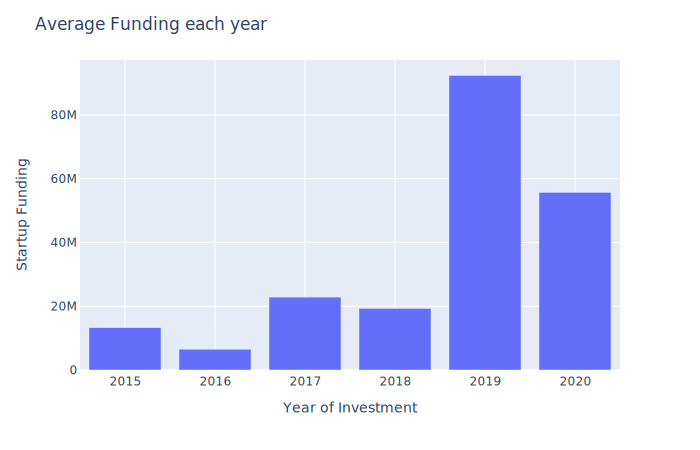

In [52]:
b = data['Date'].apply(lambda x:x.year)
c = data['Amount in USD']
d = pd.DataFrame([b,c]).T.groupby('Date')['Amount in USD'].mean()
fig = px.bar(x = d.index,y = d)
fig.update_layout(yaxis_title = 'Startup Funding',xaxis_title= 'Year of Investment',title= 'Average Funding each year')
fig.show()

### Startup Name

In [53]:
for i in data.index:
    data.loc[i,'Startup Name'] = data.loc[i,'Startup Name'].lower().replace('www.','').replace('.com','').replace('https://','').replace('.in/','')

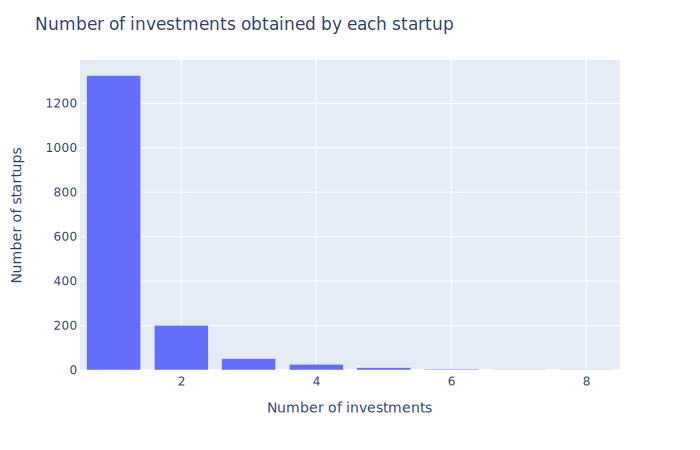

In [54]:
a = data['Startup Name'].value_counts()
b = pd.Series(a).value_counts()
fig = px.bar(x = b.index,y= b)
fig.update_layout(title= 'Number of investments obtained by each startup',xaxis_title = 'Number of investments',yaxis_title ='Number of startups')

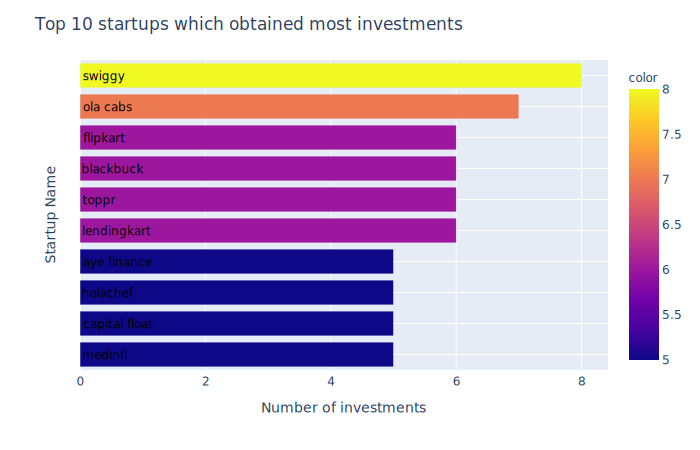

In [55]:
b = a[:10][::-1]
fig = px.bar(y = b.index,x= b,orientation='h',color = b,text = b.index,color_continuous_scale =px.colors.sequential.Plasma)
fig.update_traces(textposition='inside',insidetextanchor='start',textfont_size=12,textfont_color='black')
fig.update_layout(title= 'Top 10 startups which obtained most investments',yaxis_title = 'Startup Name',xaxis_title ='Number of investments')
fig.update_yaxes(showticklabels=False)


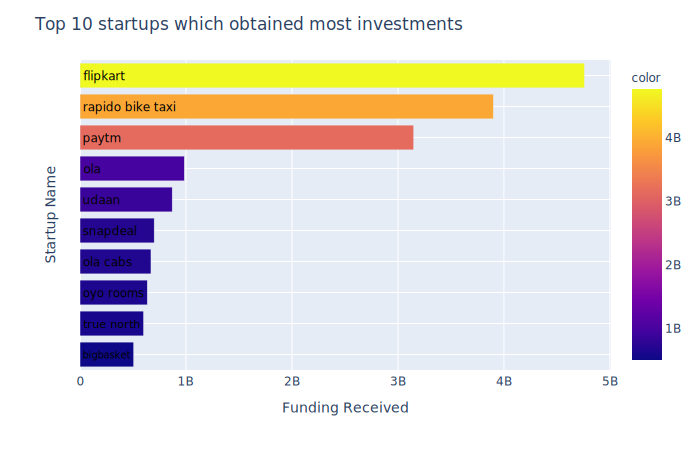

In [56]:
a = pd.Series(data.groupby('Startup Name')['Amount in USD'].sum())
f = [a.index[i] for i in a.argsort()[-10:]]
g = [a[i] for i in a.argsort()[-10:]]
fig = px.bar(y = f,x= g,orientation='h',color = g,text = f,color_continuous_scale =px.colors.sequential.Plasma)
fig.update_traces(textposition='inside',insidetextanchor='start',textfont_size=12,textfont_color='black')
fig.update_layout(title= 'Top 10 startups which obtained most investments',yaxis_title = 'Startup Name',xaxis_title ='Funding Received')
fig.update_yaxes(showticklabels=False)

### Industry Vertical

In [57]:
data2 = data.loc[data['Industry Vertical'].isna()==False]

In [58]:
from string import punctuation
for i in data2.index:
    data2.loc[i,'Industry Vertical']  =data2.loc[i,'Industry Vertical'].lower()
    for j in punctuation:
        data2.loc[i,'Industry Vertical'] = data2.loc[i,'Industry Vertical'].replace(j,'')

F:\Anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



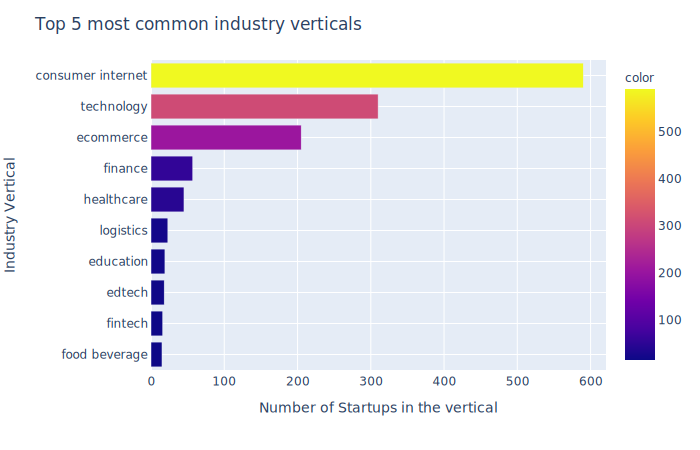

In [59]:
a = data2['Industry Vertical'].value_counts()[:10][::-1]
fig = px.bar(y = a.index,x= a,orientation='h',color = a,color_continuous_scale =px.colors.sequential.Plasma)
fig.update_layout(title= 'Top 5 most common industry verticals',yaxis_title = 'Industry Vertical',xaxis_title ='Number of Startups in the vertical')

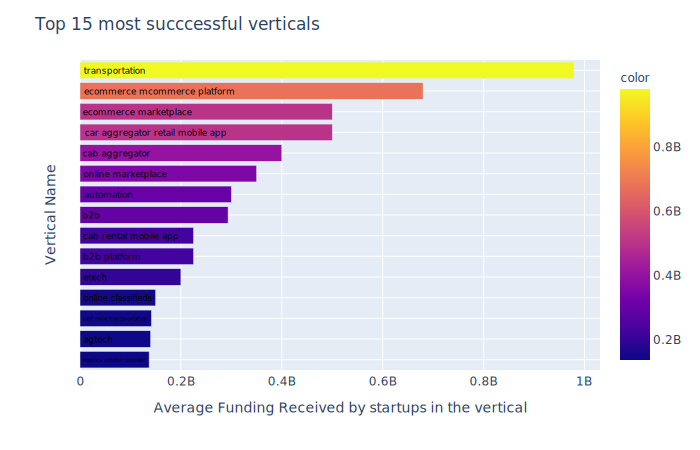

In [60]:
a = data2.groupby('Industry Vertical')['Amount in USD'].mean()
f = [a.index[i] for i in a.argsort()[-15:]]
g=  [a[i] for i in a.argsort()[-15:]]
fig = px.bar(y = f,x= g,orientation='h',color = g,text = f,color_continuous_scale =px.colors.sequential.Plasma)
fig.update_traces(textposition='inside',insidetextanchor='start',textfont_size=12,textfont_color='black')
fig.update_layout(title= 'Top 15 most succcessful verticals',yaxis_title = 'Vertical Name',xaxis_title ='Average Funding Received by startups in the vertical')
fig.update_yaxes(showticklabels=False)

### SubVertical

In [61]:
data3 = data.loc[data['SubVertical'].isna()==False]

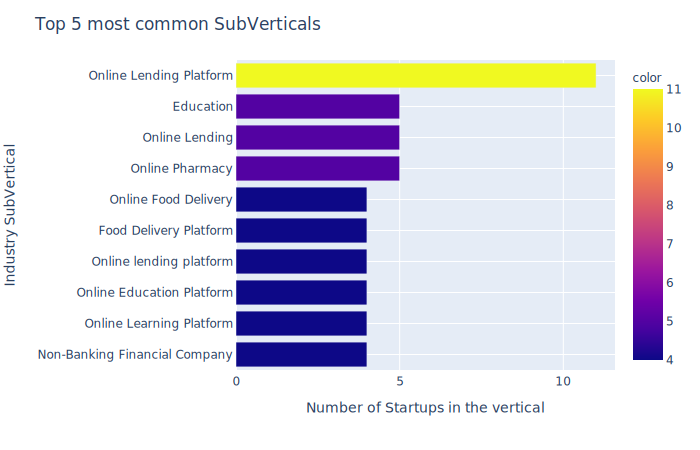

In [62]:
a = data3['SubVertical'].value_counts()[:10][::-1]
fig = px.bar(y = a.index,x= a,orientation='h',color = a,color_continuous_scale =px.colors.sequential.Plasma)
fig.update_layout(title= 'Top 5 most common SubVerticals',yaxis_title = 'Industry SubVertical',xaxis_title ='Number of Startups in the vertical')

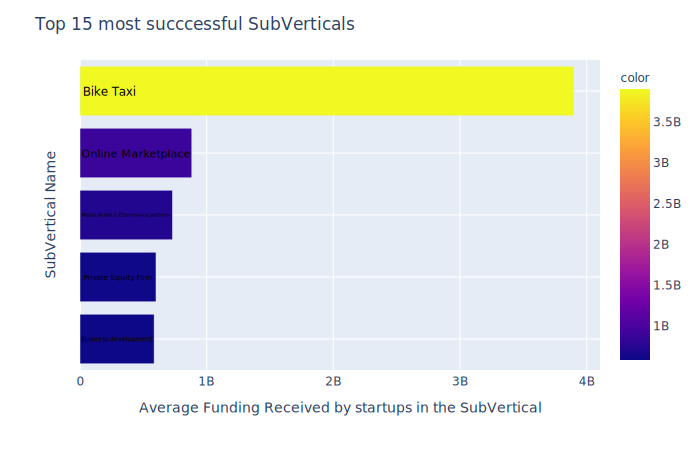

In [63]:
a = data3.groupby('SubVertical')['Amount in USD'].mean()
f = [a.index[i] for i in a.argsort()[-5:]]
g=  [a[i] for i in a.argsort()[-5:]]
fig = px.bar(y = f,x= g,orientation='h',color = g,text = f,color_continuous_scale =px.colors.sequential.Plasma)
fig.update_traces(textposition='inside',insidetextanchor='start',textfont_size=12,textfont_color='black')
fig.update_layout(title= 'Top 15 most succcessful SubVerticals',yaxis_title = 'SubVertical Name',xaxis_title ='Average Funding Received by startups in the SubVertical')
fig.update_yaxes(showticklabels=False)

### City Location

In [64]:
data2 = data.loc[data['City  Location'].isna()==False]
data2.loc[data['City  Location']=='USA/India','City  Location']= 'India/ USA'
data2.loc[data['City  Location']=='Dallas / Hyderabad','City  Location']= 'Hyderabad/ Dallas'
data2.loc[data['City  Location']=='New York/ India','City  Location']= 'India/ New York'
data2.loc[data['City  Location']=='SFO / Bangalore','City  Location']= 'Bangalore/ SFO'
data2.loc[data['City  Location']=='New York, Bengaluru','City  Location']= 'Bengaluru/ New York'

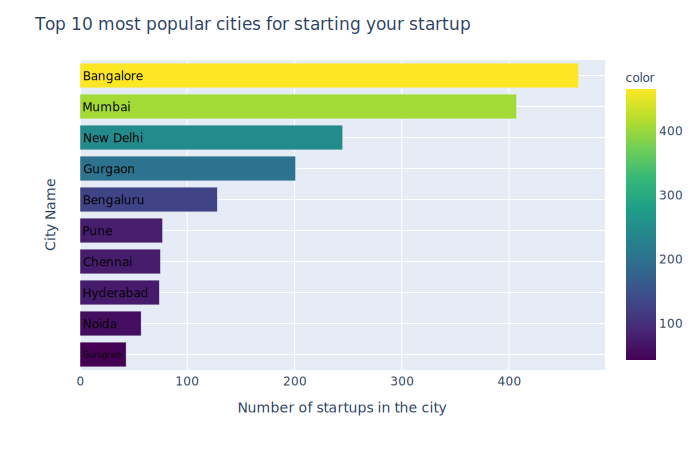

In [65]:
h = pd.Series(data2['City  Location'].apply(lambda x:x.split('/')[0].strip())).value_counts()[:10][::-1]
fig = px.bar(y = h.index,x= h,orientation='h',color = h,text = h.index,color_continuous_scale =px.colors.sequential.Viridis)
fig.update_traces(textposition='inside',insidetextanchor='start',textfont_size=12,textfont_color='black')
fig.update_layout(title= 'Top 10 most popular cities for starting your startup',yaxis_title = 'City Name',xaxis_title ='Number of startups in the city')
fig.update_yaxes(showticklabels=False)

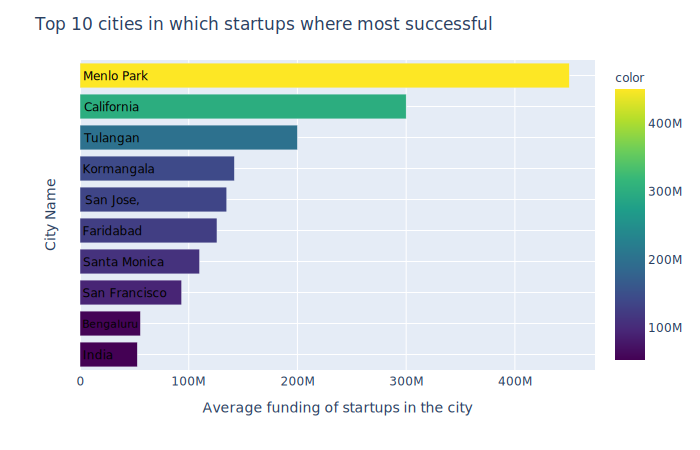

In [66]:
g = np.array(data2['City  Location'].apply(lambda x:x.split('/')[0].strip()))
f = np.array(data2['Amount in USD'])
k = pd.DataFrame([g,f],index = ['Loc','Fund']).T
k['Fund'] = k['Fund'].astype(float)
r = pd.DataFrame(k.groupby('Loc')['Fund'].mean())
h = r.sort_values(by='Fund',ascending=False)[:10][::-1]
fig = px.bar(y = h.index,x= h['Fund'],orientation='h',color = h,text =h.index,color_continuous_scale =px.colors.sequential.Viridis)
fig.update_traces(textposition='inside',insidetextanchor='start',textfont_size=12,textfont_color='black')
fig.update_layout(title= 'Top 10 cities in which startups where most successful',yaxis_title = 'City Name',xaxis_title ='Average funding of startups in the city')
fig.update_yaxes(showticklabels=False)

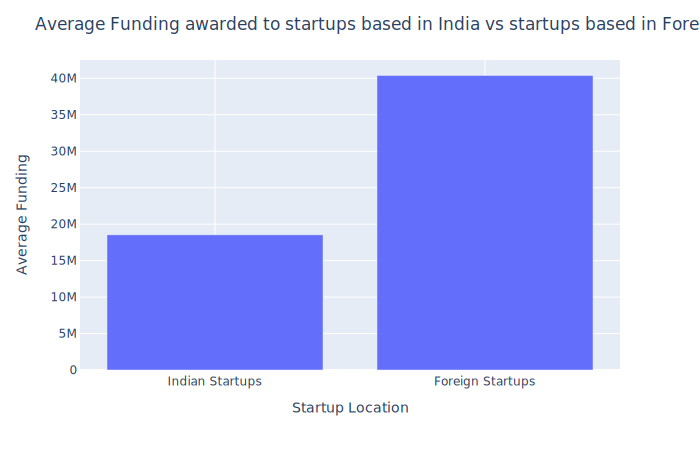

In [68]:
t = ['Bangkok','Dallas', 'Dubai', 'Global','NY',
       'New York', 'Palo Alto', 'SFO', 'San Mateo', 'Seattle',
       'Singapore', 'UK', 'US', 'USA','Singapore','Pune / US','India/US','San Francisco',
    'Bangalore / SFO','Bangalore/ Bangkok','New Delhi / US','Bangalore/ SFO','Palo Alto',
'Menlo Park','California','Mumbai / Global','Santa Monica','Bengaluru/ New York','Bangalore / San Mateo',
    'India/Singapore','Delhi & Cambridge','Missourie','San Jose','India / US','Boston','India/ New York',
     'Hyderabad/USA','Bangalore / USA','Bangalore / Palo Alto','Pune/ Dubai','India/ USA','US/India',
    'New York','Hyderabad/ Dallas','Noida / Singapore','Burnsville','Mumbai / NY']
a = []
b = []
for i in data2.index:
    if data2.loc[i,'City  Location'] in t:
        a.append(data2.loc[i,'Amount in USD'])
    else:
        b.append(data2.loc[i,'Amount in USD'])
fig  =px.bar(x = ['Indian Startups','Foreign Startups'],y = [np.mean(b),np.mean(a)]) 
fig.update_layout(yaxis_title = 'Average Funding',xaxis_title= 'Startup Location',
                  title='Average Funding awarded to startups based in India vs startups based in Foreign Countries')

### Investors Name

In [69]:
data.loc[data['Investors Name'].isna()==False,'Investors Name'] = data.loc[data['Investors Name'].isna()==False,'Investors Name'].apply(lambda x:x.lower())

In [70]:
data2 =  data.loc[data['Investors Name'].isna()==False]
a = []
for i in data2.index:
    if 'undisclosed' in data2.loc[i,'Investors Name']:
        a.append(data2.loc[i,'Investors Name'])
    elif 'group of angel investors' in data2.loc[i,'Investors Name']:
        a.append(data2.loc[i,'Investors Name'])

In [71]:
b=  np.unique(np.array(a))
for i in b:
    j = data2.loc[data2['Investors Name']==i].index
    data2 = data2.drop(j,axis=0)   

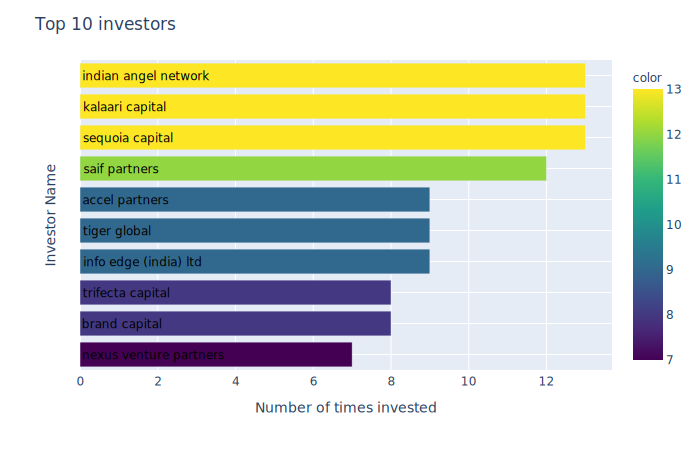

In [72]:
a = (data2['Investors Name'].value_counts())[:10][::-1]
fig = px.bar(y = a.index,x= a,orientation='h',color = a,text =a.index,color_continuous_scale =px.colors.sequential.Viridis)
fig.update_traces(textposition='inside',insidetextanchor='start',textfont_size=12,textfont_color='black')
fig.update_layout(title= 'Top 10 investors',yaxis_title = 'Investor Name',xaxis_title ='Number of times invested')
fig.update_yaxes(showticklabels=False)

### Investment Type

In [73]:
data2 = data.loc[data['InvestmentnType'].isna()==False]

In [74]:
data2['InvestmentnType'] = data2['InvestmentnType'].apply(lambda x:x.lower().replace('pre-','').replace('(extension)','').replace('-',''))    
for i in data2.index:
    if 'seed' in data2.loc[i,'InvestmentnType']:
        data2.loc[i,'InvestmentnType']= 'seed funding'
    if ('equity' in data2.loc[i,'InvestmentnType'])| ('private' in data2.loc[i,'InvestmentnType']):
        data2.loc[i,'InvestmentnType']= 'private equity'    


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



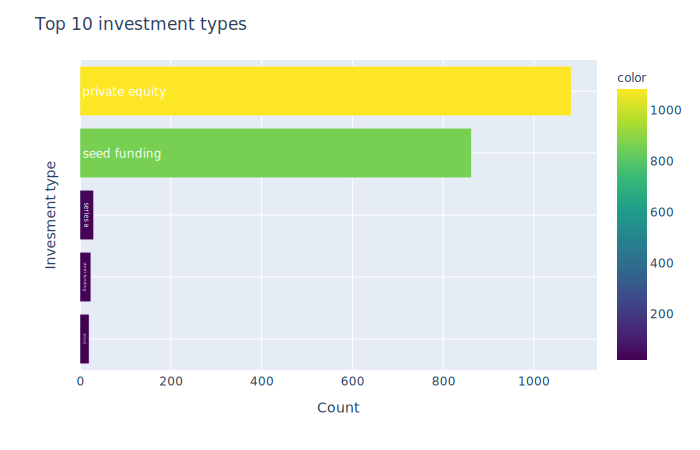

In [75]:
a = data2['InvestmentnType'].value_counts()[:5][::-1]
fig = px.bar(y = a.index,x= a,orientation='h',color = a,text =a.index,color_continuous_scale =px.colors.sequential.Viridis)
fig.update_traces(textposition='inside',insidetextanchor='start',textfont_size=12,textfont_color='white')
fig.update_layout(title= 'Top 10 investment types',yaxis_title = 'Invesment type',xaxis_title ='Count')
fig.update_yaxes(showticklabels=False)

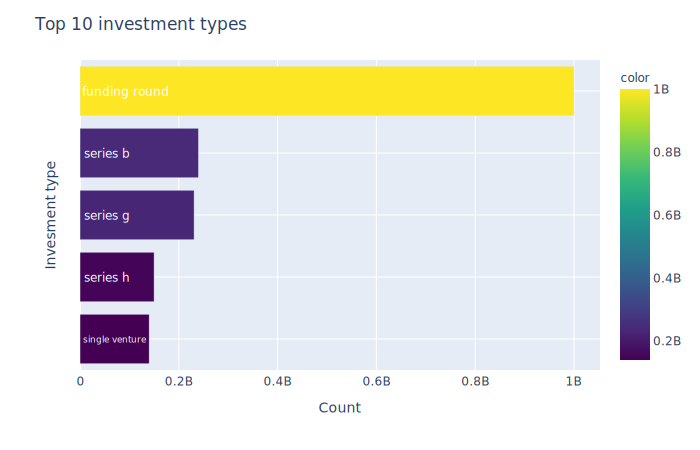

In [76]:
a = pd.DataFrame(data2.groupby('InvestmentnType')['Amount in USD'].mean()).sort_values(by='Amount in USD',ascending=False)[:5][::-1]
fig = px.bar(y = a.index,x= a['Amount in USD'],orientation='h',color = a['Amount in USD'],text =a.index,color_continuous_scale =px.colors.sequential.Viridis)
fig.update_traces(textposition='inside',insidetextanchor='start',textfont_size=12,textfont_color='white')
fig.update_layout(title= 'Top 10 investment types',yaxis_title = 'Invesment type',xaxis_title ='Count')
fig.update_yaxes(showticklabels=False)

### Funding Amount

[Text(0.5, 1.0, 'Logarithmic Scale')]

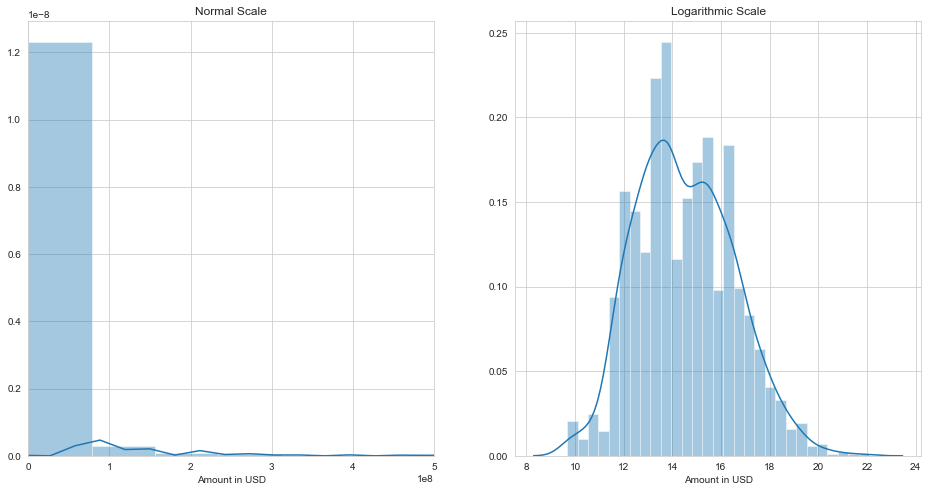

In [77]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
sns.distplot((data['Amount in USD']),ax=ax[0])
ax[0].set(xlim = [0,0.5*10**9],title = 'Normal Scale')
sns.distplot(np.log1p(data['Amount in USD']),ax=ax[1])
ax[1].set(title = 'Logarithmic Scale')

# Feature Engineering

Here we make our training set based on the results and the hypotheses made from EDA.

Then we will use this training set to make the predictive model.

We will not use the column Investor Name for the model because non funded startups dont know their potential investors name

In [78]:
# Removing some data which dont have any infromation in most of the columns
a  = data.loc[(data['Industry Vertical'].isna()) & (data['SubVertical'].isna()) & (data['City  Location'].isna())]
data = data.drop(a.index,axis=0)

In [79]:
# Date
train = pd.DataFrame(data['Startup Name'])
train['Month'] = data['Date'].apply(lambda x:x.month)
train['Year'] = data['Date'].apply(lambda x:x.year)
train['Quarter'] = data['Date'].apply(lambda x:x.quarter)

In [80]:
# Industry Vertical
from string import punctuation
for i in data.index:
    data.loc[i,'Industry Vertical']  =data.loc[i,'Industry Vertical'].lower()
    for j in punctuation:
        data.loc[i,'Industry Vertical'] = data.loc[i,'Industry Vertical'].replace(j,'')
a = ['last mile transportation', 'transport', 'transportation','auto insurance online platform', 'auto rickshaw based services', 'automobile', 'automotive',
       'autorickshaw aggregator  booking platform','car aggregator  retail mobile app',
       'car maintenance  management mobile app','mobile car servicing appointment app',
       'online car rental affiliates', 'self driven rental car platform',
       'selfdriven car rental', 'used car marketplace','last minute travel deals mobile marketplace',
       'online travel marketplace',
       'travel destination discovery platform', 'travel entertainment',
       'travel information portal', 'travel tech']
for i in data.index:
    if 'consumer' in data.loc[i,'Industry Vertical']:
        data.loc[i,'Industry Vertical']= 'consumer internet'    
    elif 'food' in data.loc[i,'Industry Vertical']:
        data.loc[i,'Industry Vertical']= 'food tech'    
    elif 'fin' in data.loc[i,'Industry Vertical']:
        data.loc[i,'Industry Vertical']= 'fintech'    
    elif data.loc[i,'Industry Vertical'] in ['information technology','technology','it']:
        data.loc[i,'Industry Vertical']= 'it'    
    elif 'health' in data.loc[i,'Industry Vertical']:
        data.loc[i,'Industry Vertical']= 'healthcare'    
    elif 'education' in data.loc[i,'Industry Vertical']:
        data.loc[i,'Industry Vertical']= 'edtech'    
    elif 'logistics' in data.loc[i,'Industry Vertical']:
        data.loc[i,'Industry Vertical']= 'logistics tech'    
    elif 'fashion' in data.loc[i,'Industry Vertical']:
        data.loc[i,'Industry Vertical']= 'fashion tech'    
    elif 'software' in data.loc[i,'Industry Vertical']:
        data.loc[i,'Industry Vertical']= 'saas'    
    elif 'estate' in data.loc[i,'Industry Vertical']:
        data.loc[i,'Industry Vertical']= 'real estate'    
    elif 'anal' in data.loc[i,'Industry Vertical']:
        data.loc[i,'Industry Vertical']= 'analytics'    
    elif 'social' in data.loc[i,'Industry Vertical']:
        data.loc[i,'Industry Vertical']= 'social media'    
    elif 'medical' in data.loc[i,'Industry Vertical']:
        data.loc[i,'Industry Vertical']= 'healthcare'    
    elif 'fund' in data.loc[i,'Industry Vertical']:
        data.loc[i,'Industry Vertical']= 'funding'    
    elif 'ecommerce' in data.loc[i,'Industry Vertical']:
        data.loc[i,'Industry Vertical']= 'ecommerce'    
    elif data.loc[i,'Industry Vertical'] in a:
        data.loc[i,'Industry Vertical']= 'automobile'    

for i in data.index:
    if data.loc[i,'Industry Vertical'] not in data['Industry Vertical'].value_counts()[:15].index:
        data.loc[i,'Industry Vertical']='other'                           
train['Vertical'] = data['Industry Vertical']        

In [81]:
# City Location
data.loc[data['City  Location'].isna(),'City  Location'] = ['Ahmedabad','USA','Mumbai','Chennai']

for i in data.index:
    data.loc[i,'City  Location']  =data.loc[i,'City  Location'].lower()
    if 'bengaluru' in data.loc[i,'City  Location']:
        data.loc[i,'City  Location']=data.loc[i,'City  Location'].replace('bengaluru','bangalore')
        
data.loc[data['City  Location']=='delhi & cambridge','City  Location'] = 'delhi/cambridge'
data.loc[data['City  Location']=='bangalore and gurugram','City  Location'] = 'bangalore / gurugram'
data.loc[data['City  Location']=='new york, bangalore','City  Location'] = 'new york/bangalore'

a = pd.DataFrame(data['City  Location'].apply(lambda x:x.split('/')[0].strip()))
b = pd.DataFrame(data['City  Location'].apply(lambda x:'NA' if '/' not in x else x.split('/')[1].strip()))
c = ['singapore','us','bangkok','sfo','san francisco','san mateo','cambridge','uk','new york',
'san jose','santa monica','boston','ny','seattle','global','usa','california','missourie',
'palo alto','burnsville','dallas','menlo park']
train['Foreign']=0
for i in train.index:
    if (a.loc[i,'City  Location'] in c)| (b.loc[i,'City  Location'] in c):
        train.loc[i,'Foreign']=1
        
train['City'] = 0
for i in train.index:
    if '/' not in data.loc[i,'City  Location']:
        train.loc[i,'City'] = data.loc[i,'City  Location']
    else:
        if (a.loc[i,'City  Location'] not in c)| (b.loc[i,'City  Location'] not in c):
            train.loc[i,'City'] = data.loc[i,'City  Location'].split('/')[0].strip()
        else:
            for j in c:
                if (a.loc[i,'City  Location'] == j)| (b.loc[i,'City  Location'] == j):
                    train.loc[i,'City']=j

In [82]:
# Investment Type
data.loc[data['InvestmentnType'].isna(),'InvestmentnType'] = ['private equity','private equity','private equity']

data['InvestmentnType'] = data['InvestmentnType'].apply(lambda x:x.lower().replace('pre-','').replace('(extension)','').replace('-',''))    
for i in data.index:
    if 'seed' in data.loc[i,'InvestmentnType']:
        data.loc[i,'InvestmentnType']= 'seed funding'
    if ('equity' in data.loc[i,'InvestmentnType'])| ('private' in data.loc[i,'InvestmentnType']):
        data.loc[i,'InvestmentnType']= 'private equity'    

train['InvestmentType'] = 'Other'
for i in data.index:
    if data.loc[i,'InvestmentnType'] == 'private equity':
        train.loc[i,'InvestmentType']= 'private equity'
    elif data.loc[i,'InvestmentnType']=='seed funding':
        train.loc[i,'InvestmentType']= 'seed funding'       

For SubVertical column , the information is depicted in text.

We will use a TfiDf vectorizer to get some acitve keywords which can tell us how much funding the startup should get

In [83]:
# SubVertical
from nltk import TweetTokenizer
from string import punctuation
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')
stopwords_json = {"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
stopwords_json_en = set(stopwords_json['en'])
stopwords_nltk_en = set(stopwords_en)
stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en)
tt = TweetTokenizer()
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def stem_tokens(tokens, porter):
    stemmed = []
    for item in tokens:
        stemmed.append(porter.stem(item))
    return stemmed
    
def clean_text(text):
    text = text.lower()
    for i in punctuation:
        text = text.replace(i,'')
    texts = tt.tokenize(text)
    a = list(filter(lambda x:x not in stoplist_combined,texts))
    b = stem_tokens(a,porter)
    return b

from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(analyzer='word',tokenizer=clean_text,ngram_range=(1,2),min_df=0,max_df=0.5)

matrix = vect.fit_transform(data.loc[data['SubVertical'].isna()==False,'SubVertical'])
j = data.loc[data['SubVertical'].isna()==False].index
importance_matrix = pd.DataFrame(matrix.toarray(),columns =[name for name in vect.get_feature_names()],index = j)

imp = pd.DataFrame(0,index = train.index,columns = importance_matrix.columns)
for i in train.index:
    if i in importance_matrix.index:
        imp.loc[i,:] = np.array(importance_matrix.loc[i,:])

from sklearn.decomposition import PCA
pca = PCA(n_components=0.9,svd_solver='full')
h = pca.fit_transform(imp)        

In [84]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
x = pd.concat([train,pd.DataFrame(h,index=train.index)],axis=1)
cols = ['Year','Vertical','City','InvestmentType']
ct = ColumnTransformer(transformers=[("categorical_features", OrdinalEncoder(),cols)],
                      remainder="passthrough")
x1 = pd.DataFrame(ct.fit_transform(x))

In [85]:
num_feats = x.dtypes[x.dtypes!='object'].index

In [91]:
x1 = x1.drop([4],axis=1)
data['Amount in USD'] = data['Amount in USD'].astype(float)
y = np.log1p(data['Amount in USD']/10**4)

# Making the prediction model

In [88]:
x2 = x1.loc[:,0:7]

In [92]:
x1.loc[x1.index,:] = x1.loc[x1.index,:].astype(int)

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.2,random_state=42)

In [94]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [96]:
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
model = LGBMRegressor()
model.fit(x_train,y_train)
print(rmse(np.expm1(model.predict(x_test))*10**4,np.expm1(y_test)*10**4))
print(rmse(np.expm1(model.predict(x_train))*10**4,np.expm1(y_train)*10**4))
print(r2_score(np.expm1(y_test)*10**4,np.expm1(model.predict(x_test))*10**4))
print(r2_score(np.expm1(y_train)*10**4,np.expm1(model.predict(x_train))*10**4))

70708222.69335335
133556180.78227243
0.016246617799596574
0.023544649797250017
